In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('PFE', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,36.939999,36.270000,36.869999,36.810001,33565700.0,35.156662
2021-01-05,37.369999,36.599998,36.720001,37.189999,29909400.0,35.519588
2021-01-06,37.480000,36.770000,36.830002,36.869999,34962500.0,35.213963
2021-01-07,37.150002,36.669998,37.040001,37.060001,27809500.0,35.395428
2021-01-08,37.529999,36.900002,37.160000,37.130001,33462400.0,35.462288
...,...,...,...,...,...,...
2022-03-29,54.080002,52.619999,54.000000,52.740002,39970000.0,52.740002
2022-03-30,53.720001,51.970001,53.200001,52.439999,27599600.0,52.439999
2022-03-31,52.880001,51.740002,52.000000,51.770000,26055200.0,51.770000


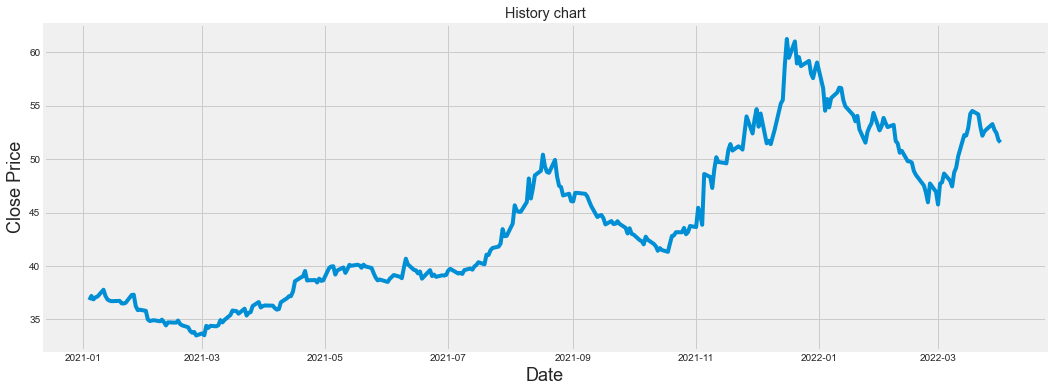

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.19596538e-01],
       [1.33285201e-01],
       [1.21757833e-01],
       [1.28602302e-01],
       [1.31123905e-01],
       [1.54178640e-01],
       [1.32925031e-01],
       [1.21397663e-01],
       [1.17435105e-01],
       [1.15633980e-01],
       [1.16714628e-01],
       [1.08429341e-01],
       [1.07708863e-01],
       [1.10230466e-01],
       [1.36527281e-01],
       [1.37608066e-01],
       [9.90634066e-02],
       [8.53746065e-02],
       [8.68155617e-02],
       [8.32131736e-02],
       [5.40345854e-02],
       [4.86310719e-02],
       [5.04321973e-02],
       [5.15128450e-02],
       [4.79105943e-02],
       [5.33141078e-02],
       [4.50288212e-02],
       [3.38616240e-02],
       [4.43083435e-02],
       [4.32275584e-02],
       [5.04321973e-02],
       [3.85446599e-02],
       [3.42217942e-02],
       [2.77376329e-02],
       [1.51296180e-02],
       [9.36593434e-03],
       [1.18875373e-02],
       [0.00000000e+00],
       [7.20450145e-03],
       [7.20340212e-04],


In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.11959654, 0.1332852 , 0.12175783, 0.1286023 , 0.13112391,
       0.15417864, 0.13292503, 0.12139766, 0.11743511, 0.11563398,
       0.11671463, 0.10842934, 0.10770886, 0.11023047, 0.13652728,
       0.13760807, 0.09906341, 0.08537461, 0.08681556, 0.08321317,
       0.05403459, 0.04863107, 0.0504322 , 0.05151284, 0.04791059,
       0.05331411, 0.04502882, 0.03386162, 0.04430834, 0.04322756,
       0.0504322 , 0.03854466, 0.03422179, 0.02773763, 0.01512962,
       0.00936593, 0.01188754, 0.        , 0.0072045 , 0.00072034,
       0.03242067, 0.02557634, 0.03242067, 0.03097971, 0.0345821 ,
       0.05187315, 0.04394804, 0.05223332, 0.0691642 , 0.08429396,
       0.082853  , 0.08213253, 0.07348693, 0.09041781, 0.06736308,
       0.07636884, 0.07853014, 0.09942358, 0.11275207, 0.09438037])]
[0.09870309904320629]

[array([0.11959654, 0.1332852 , 0.12175783, 0.1286023 , 0.13112391,
       0.15417864, 0.13292503, 0.12139766, 0.11743511, 0.11563398,
       0.11671463, 0.10842934, 0.10

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 3s 143ms/step - loss: 0.1895
Epoch 2/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0330
Epoch 3/256
2/2 [==============================] - 0s 129ms/step - loss: 0.0361
Epoch 4/256
2/2 [==============================] - 0s 129ms/step - loss: 0.0208
Epoch 5/256
2/2 [==============================] - 0s 127ms/step - loss: 0.0083
Epoch 6/256
2/2 [==============================] - 0s 126ms/step - loss: 0.0160
Epoch 7/256
2/2 [==============================] - 0s 129ms/step - loss: 0.0180
Epoch 8/256
2/2 [==============================] - 0s 129ms/step - loss: 0.0130
Epoch 9/256
2/2 [==============================] - 0s 128ms/step - loss: 0.0081
Epoch 10/256
2/2 [==============================] - 0s 129ms/step - loss: 0.0083
Epoch 11/256
2/2 [==============================] - 0s 128ms/step - loss: 0.0102
Epoch 12/256
2/2 [==============================] - 0s 127ms/step - loss: 0.0091
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.0842243063428996

C:\Users\ASUS\AppData\Local\Temp/ipykernel_8148/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


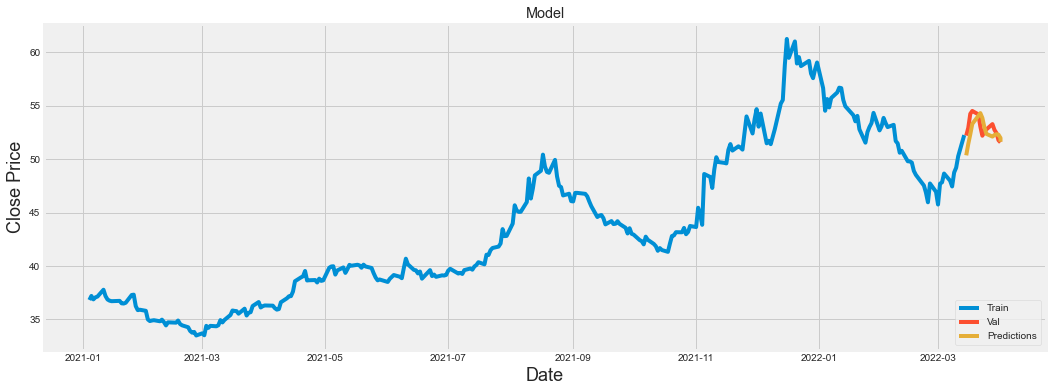

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,52.209999,50.355427
2022-03-16,52.919998,51.415085
2022-03-17,54.240002,52.317314
2022-03-18,54.509998,53.299007
2022-03-21,54.189999,54.045990
2022-03-22,53.040001,54.307652
2022-03-23,52.189999,53.856358
2022-03-24,52.590000,52.974590
2022-03-25,52.779999,52.363518
